In [7914]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



#import plotty
import warnings
warnings.filterwarnings('ignore')

In [7915]:
df = pd.read_csv(r"C:\Users\hp-pc\Desktop\Projects\Evaluation\Avacado project\avocado.csv\avocado.csv")
df #read the csv file

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7916]:
df.shape #check the shape of the column

(18249, 14)

# Documentation

In [7917]:
# 1. Unnecssary column- 'Unnamed'
# 2. No Null Values
# 3. Some columns are in int, float and 3 columns are in object
# 4. some coloumns are highly correlated to each other
# 5. Split the Date column into two columns ( month and day)
# 6. remove the outliers
# 7. columns are highly left skewed
# 8. 4046,4225,4770,Total bags, Small Bags, Large Bags have zero values
# 9. XLarge Bags have min, 25% and 50% quartile range values are zero
# 10. convert Type column from obj to int by using Label Encoder

In [7918]:
df.drop(columns ='Unnamed: 0', inplace = True) #drop unncessary column

In [7919]:
df.shape #now, check the shape

(18249, 13)

In [7920]:
df.describe() #check the parameters

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7921]:
df.info() #check the null values and type of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7922]:
df.duplicated().sum() #check the duplicate value in dataset

0

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

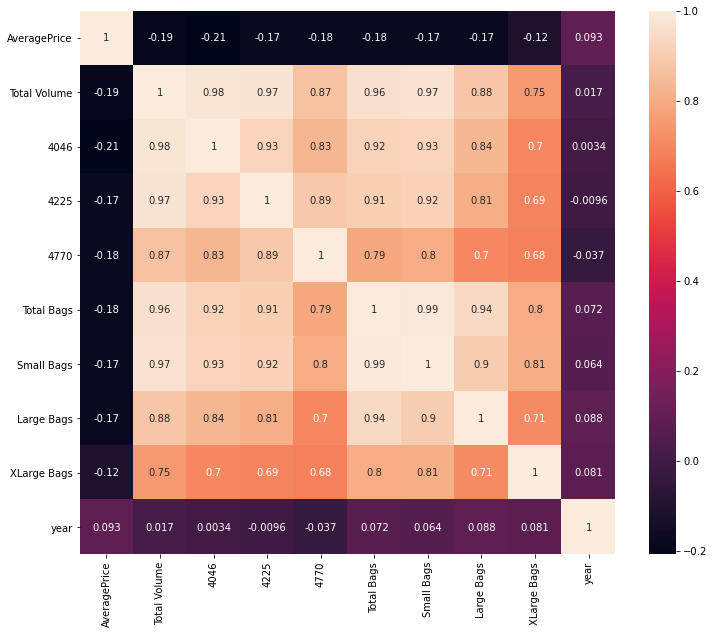

In [7923]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

In [7924]:
#divide the date and month into two columns.
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [7925]:
df.drop(columns=['Date'], inplace = True) #drop Date column

In [7926]:
df.head() 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [7927]:
lab_enc = LabelEncoder() #use label encoder to Transform Type and region column 

In [7928]:
df_type = lab_enc.fit_transform(df['type'])
df_region = lab_enc.fit_transform(df['region'])

In [7929]:
m = pd.Series(df_type)
m = pd.Series(df_region)

In [7930]:
df['type'] = df_type #save the values in their respective columns
df['region']= df_region

In [7931]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


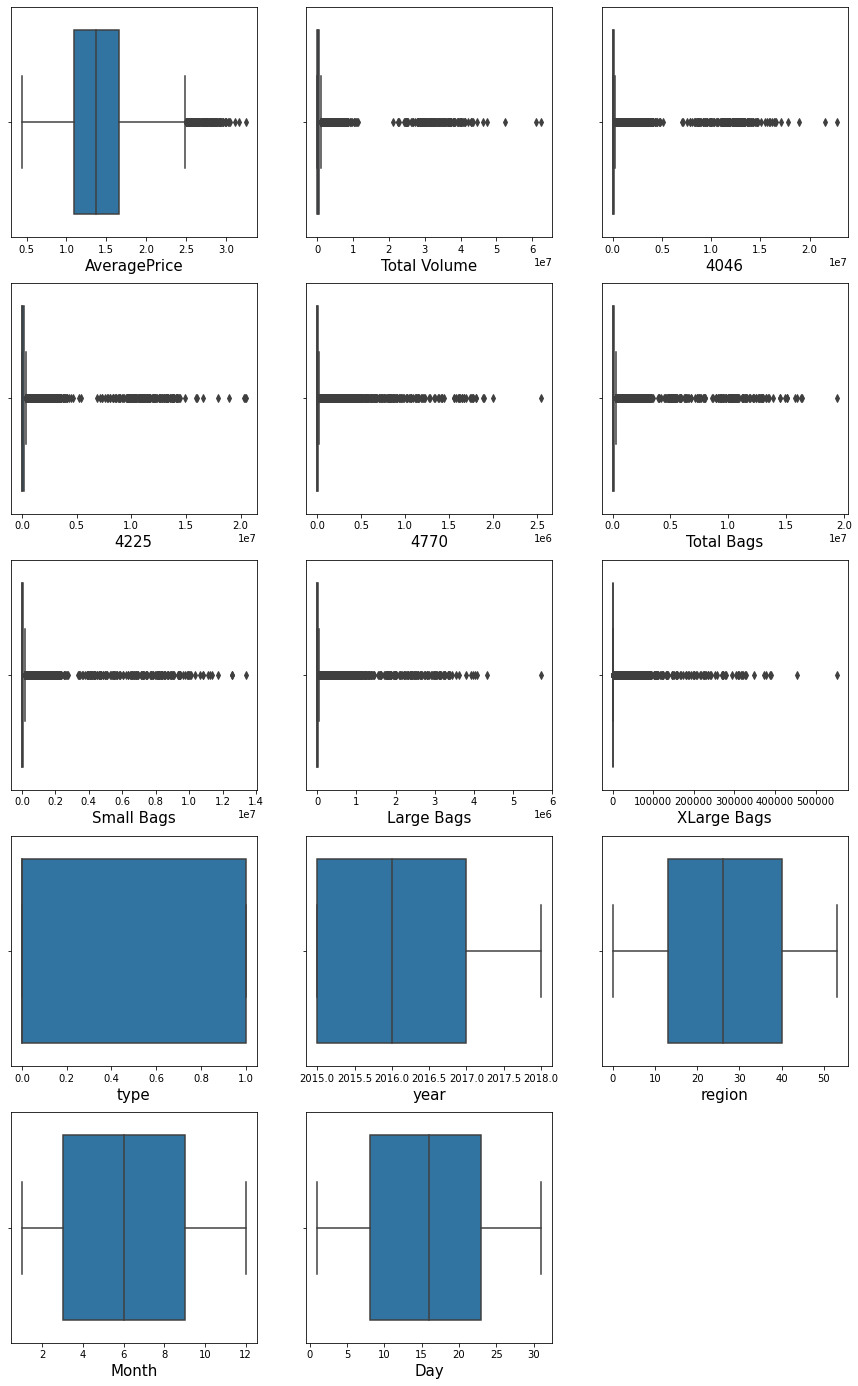

In [7932]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
plt.show() 

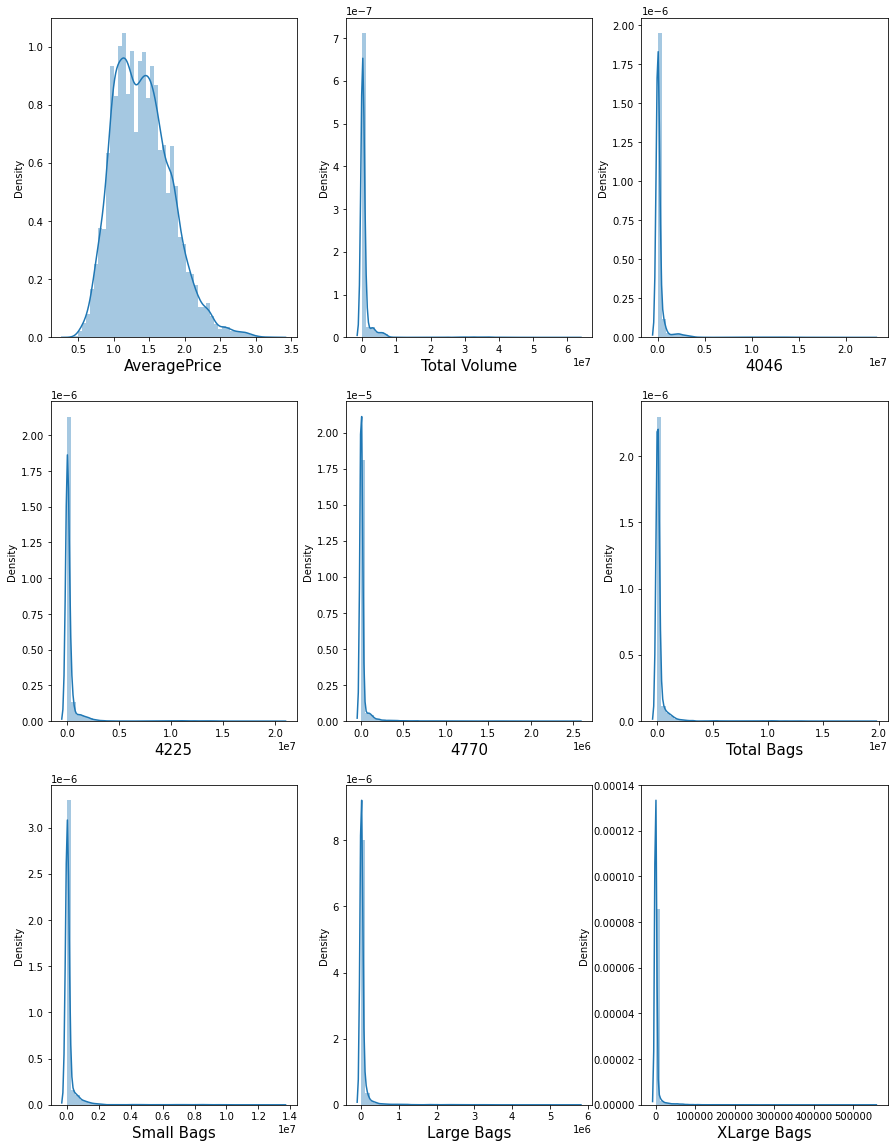

In [7933]:
#visaulize the columns by using distplot
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

# Column1: Total Volume

In [7934]:
df['Total Volume'].unique() #check the unique value in our dataset

array([ 64236.62,  54876.98, 118220.22, ...,  13766.76,  16205.22,
        17489.58])

In [7935]:
df['Total Volume'].describe() #check the mean, std, iqr and quartile range parameters

count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64

In [7936]:
df['Total Volume'].value_counts() #check the number of counts for particular value

3713.49      2
9465.99      2
569349.05    2
2038.99      2
3529.44      2
            ..
4356.15      1
243012.20    1
25937.71     1
331077.90    1
69191.72     1
Name: Total Volume, Length: 18237, dtype: int64

In [7937]:
df['Total Volume'].isnull().sum() #check null values

0

In [7938]:
df['Total Volume'].all() #check the zero value

True

correlation between the Features and with label:-----> (14, 14)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

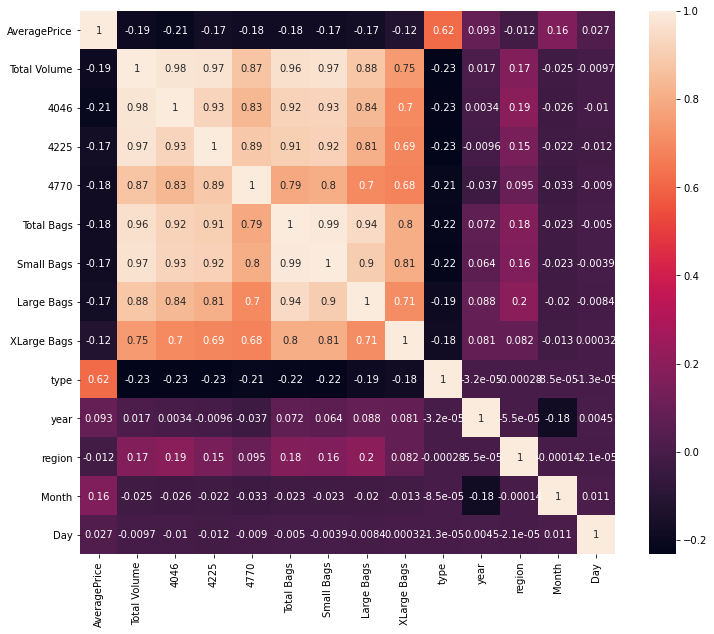

In [7939]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

In [7940]:
#We can see this highly correlated with 4046,4224,4770,Total Bags, Small bags, large bags, xlarge bags

In [7941]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Total Volume'].mean())
print('Median of the column:----->',df['Total Volume'].median())
print('Mode of the column:----->',st.mode(df['Total Volume']))
print('std of the column:----->',df['Total Volume'].std())
#mean,median,mode,std values are very high and not interpretable.

Mean of the column:-----> 850644.0130089332
Median of the column:-----> 107376.76
Mode of the column:-----> 569349.05
std of the column:-----> 3453545.3553994815


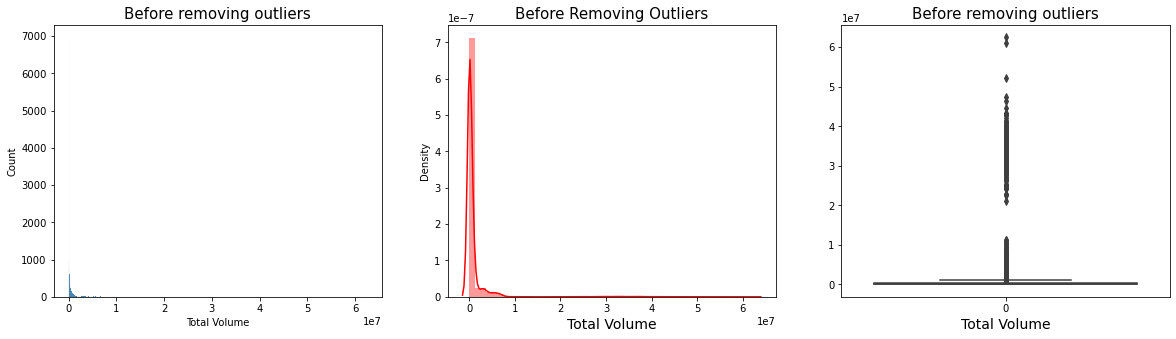

In [7942]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Total Volume']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)

plt.subplot(1,3,2)
sns.distplot(df['Total Volume'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Total Volume', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Total Volume']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Total Volume', fontsize= 14)
plt.show()

In [7943]:
#This column is highly correlated with many columns
#Very high amount of outliers cannot recovered beacuse it may drop some useful values in our dataset
#Mean, mode, median and std values are very high beacuse of huge amount of outliers

In [7944]:
#It is better to drop this column because too many outliers
df.drop(columns=['Total Volume'], inplace = True)

In [7945]:
df.shape #Check the shape of the dataset now

(18249, 13)

# Columns2: 4046

In [7946]:
df['4046'].unique()#check the unique value in our dataset

array([1036.74,  674.28,  794.7 , ..., 1191.92, 1527.63, 2894.77])

In [7947]:
df['4046'].value_counts()#check the number of counts for particular value

0.00         242
3.00          10
4.00           8
1.00           8
1.24           8
            ... 
3566.00        1
2154.42        1
128463.84      1
885.46         1
48461.43       1
Name: 4046, Length: 17702, dtype: int64

In [7948]:
df['4046'].all()#check the zero value

False

In [7949]:
df['4046'] = df['4046'].replace(0, df['4046'].mean())#replace all zeros by mean value

In [7950]:
df['4046'].all()#check the zero value

True

In [7951]:
df['4046'].describe()#check the mean, std, iqr and quartile range parameters

count    1.824900e+04
mean     2.968940e+05
std      1.264533e+06
min      1.000000e+00
25%      9.750900e+02
50%      9.954770e+03
75%      1.217699e+05
max      2.274362e+07
Name: 4046, dtype: float64

correlation between the Features and with label:-----> (13, 13)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

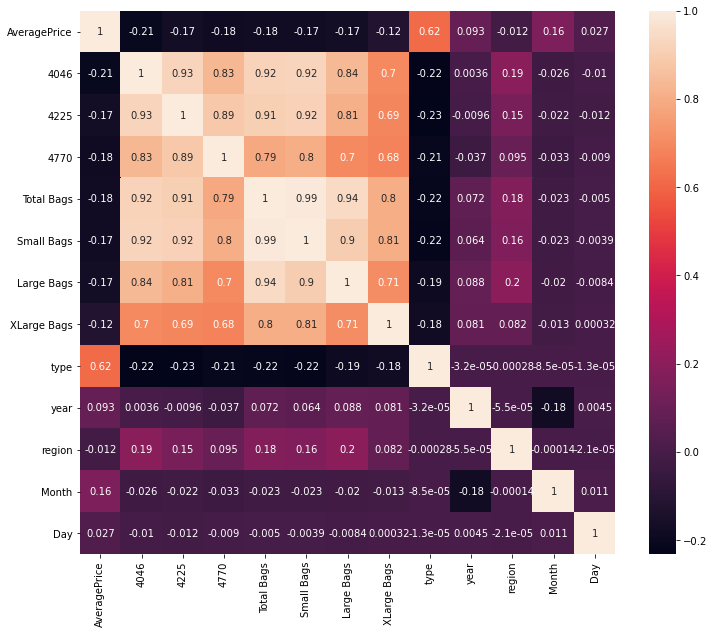

In [7952]:
# Check the correlation 
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [7953]:
#this column is highly correlated with 4225, 4770, Total bags, Small Bags

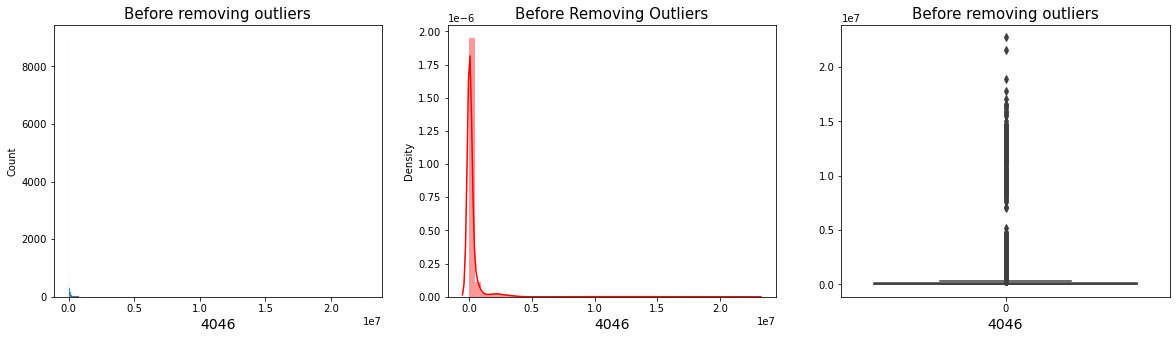

In [7954]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['4046']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('4046', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['4046'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('4046', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['4046']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('4046', fontsize= 14)
plt.show()

In [7955]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['4046'].mean())
print('Median of the column:----->',df['4046'].median())
print('Mode of the column:----->',st.mode(df['4046']))
print('std of the column:----->',df['4046'].std())

Mean of the column:-----> 296894.00942498347
Median of the column:-----> 9954.77
Mode of the column:-----> 293008.42453066056
std of the column:-----> 1264532.9995229465


In [7956]:
#This column is highly correlated with 4 columns
#too many outliers which cannot be removed
#mean, median, mode and std values are not proper

In [7957]:
#drop this column beacuse of too many outliers
df.drop(columns = '4046', inplace = True)

# Column3: 4225

In [7958]:
df['4225'].unique()#check the unique value in our dataset

array([ 54454.85,  44638.81, 109149.67, ...,   2452.79,   2981.04,
         2356.13])

In [7959]:
df['4225'].describe()#check the mean, std, iqr and quartile range parameters

count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64

correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

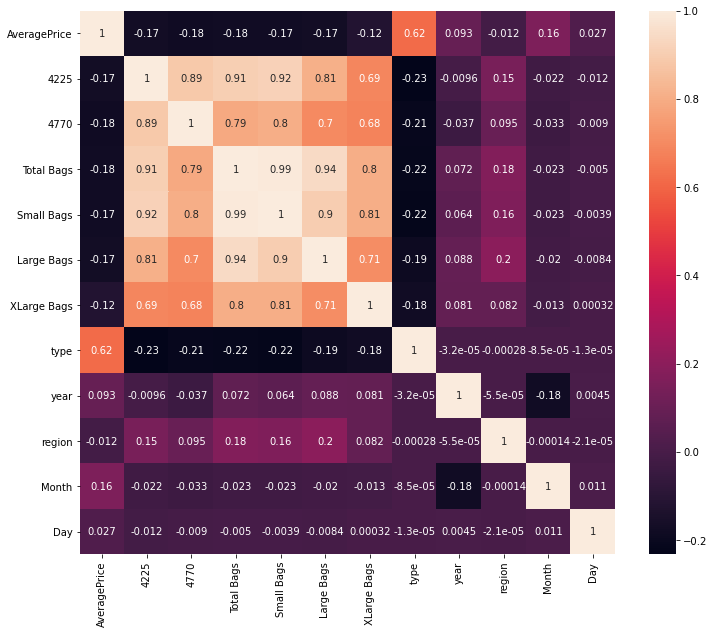

In [7960]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [7961]:
#we can see that this column is highly correlated with 4770, Total bags, Small bags

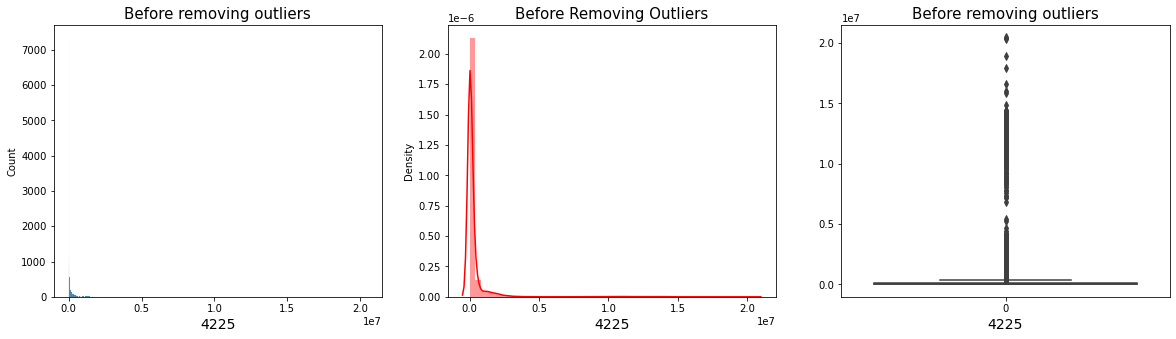

In [7962]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['4225']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('4225', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['4225'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('4225', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['4225']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('4225', fontsize= 14)
plt.show()

In [7963]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['4225'].mean())
print('Median of the column:----->',df['4225'].median())
print('Mode of the column:----->',st.mode(df['4225']))
print('std of the column:----->',df['4225'].std())

Mean of the column:-----> 295154.56835607596
Median of the column:-----> 29061.02
Mode of the column:-----> 0.0
std of the column:-----> 1204120.4011350493


In [7964]:
#This column is highly correlated with many columns
#Very high amount of outliers cannot recovered beacuse it may drop some useful values in our dataset
#Mean, mode, median and std values are not good beacuse of huge amount of outliers

In [7965]:
#drop this column beacuse of too many outliers
df.drop(columns=['4225'], inplace = True)

In [7966]:
df.head()

,AveragePrice,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [7967]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (18249, 11)


# Columns4 :4770

In [7968]:
df['4770'].unique()#check the unique value in our dataset

array([ 48.16,  58.33, 130.5 , ..., 727.94, 727.01, 224.53])

In [7969]:
df['4770'].value_counts()#check the number of counts for particular value

0.00         5497
3.32            7
2.66            7
1.59            6
1.64            6
             ... 
52459.24        1
15441.14        1
143538.35       1
122938.43       1
8317.29         1
Name: 4770, Length: 12071, dtype: int64

In [7970]:
df['4770'].all()#check the zero value

False

In [7971]:
df['4770'] = df['4770'].replace(0.0, df['4770'].mean()) #replace zeros by mean value

In [7972]:
df['4770'].all()#check the zero value

True

In [7973]:
df['4770'].value_counts()#check the number of counts for particular value

22839.735993     5497
2.660000            7
3.320000            7
10.970000           6
1.640000            6
                 ... 
52459.240000        1
15441.140000        1
143538.350000       1
122938.430000       1
8317.290000         1
Name: 4770, Length: 12071, dtype: int64

correlation between the Features and with label:-----> (11, 11)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

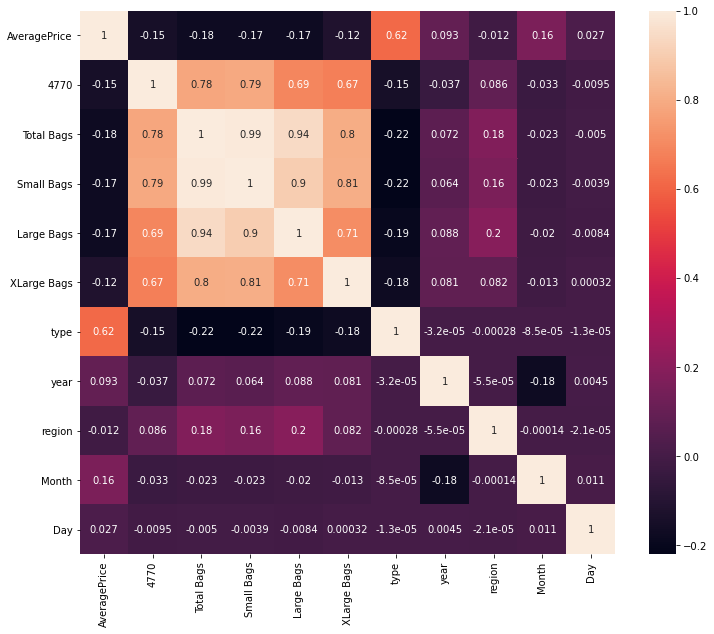

In [7974]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

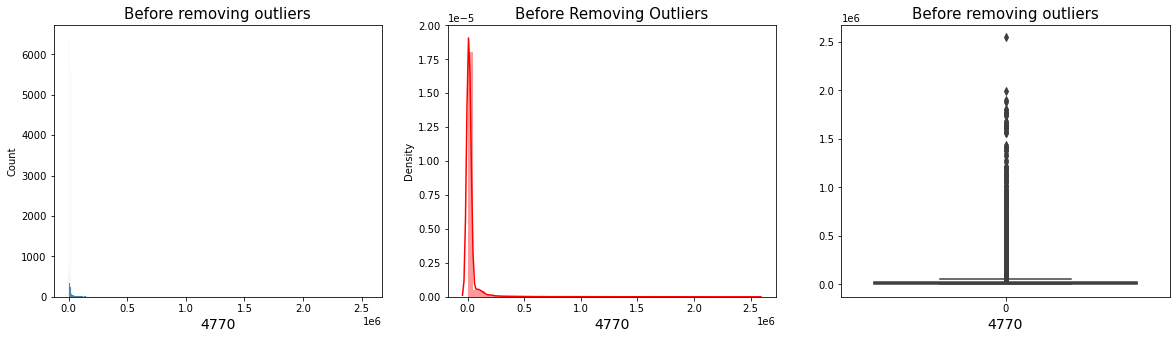

In [7975]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['4770']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('4770', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['4770'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('4770', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['4770']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('4770', fontsize= 14)
plt.show()

In [7976]:
#This column is highly correlated with many columns
#Very high amount of outliers cannot recovered beacuse it may drop some useful values in our dataset
#Mean, mode, median and std values are not good beacuse of huge amount of outliers

In [7977]:
#drop this column beacuse of too many outliers
df.drop(columns = ['4770'], inplace = True)

In [7978]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (18249, 10)


In [7979]:
df.head()

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


# Columns5 : Total Bags

In [7980]:
df['Total Bags'].unique()#check the unique value in our dataset

array([ 8696.87,  9505.56,  8145.35, ...,  9394.11, 10969.54, 12014.15])

In [7981]:
df['Total Bags'].value_counts()#check the number of counts for particular value

0.00         15
300.00        5
990.00        5
266.67        4
916.67        4
             ..
363283.69     1
3055.27       1
109148.95     1
458287.40     1
83660.42      1
Name: Total Bags, Length: 18097, dtype: int64

In [7982]:
df['Total Bags'].describe()#check the mean, std, iqr and quartile range parameters

count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64

In [7983]:
df['Total Bags'].all()#check the zero value

False

In [7984]:
df['Total Bags'] = df['Total Bags'].replace(0.0, df['Total Bags'].mean())

In [7985]:
df['Total Bags'].all()#check the zero value

True

In [7986]:
df['Total Bags'].describe()#check the mean, std, iqr and quartile range parameters

count    1.824900e+04
mean     2.398362e+05
std      9.862184e+05
min      3.090000e+00
25%      5.108010e+03
50%      3.992521e+04
75%      1.112384e+05
max      1.937313e+07
Name: Total Bags, dtype: float64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

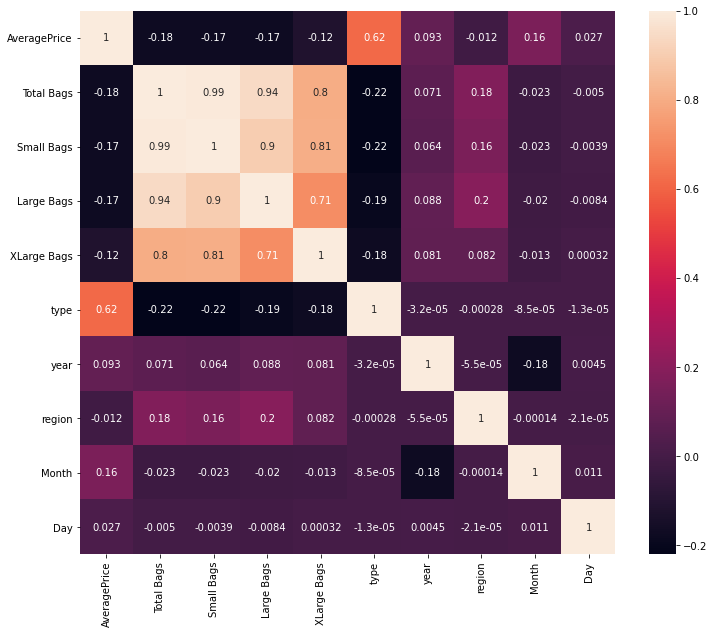

In [7987]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

In [7988]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Total Bags'].mean())
print('Median of the column:----->',df['Total Bags'].median())
print('Mode of the column:----->',st.mode(df['Total Bags']))
print('std of the column:----->',df['Total Bags'].std())
#mean,median,mode values are very high

Mean of the column:-----> 239836.176580684
Median of the column:-----> 39925.21
Mode of the column:-----> 239639.20205983953
std of the column:-----> 986218.4473063316


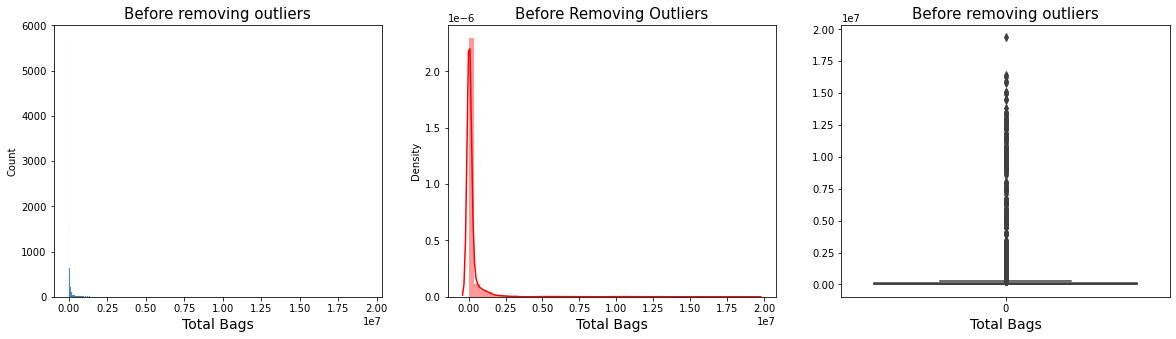

In [7989]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Total Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Total Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Total Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)
plt.show()

In [7990]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Total Bags'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Total Bags'], 55,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Total Bags'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['Total Bags'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 46068.579999999994

 **************************************************
Higher range:-
 (array([  104,   105,   106, ..., 18234, 18235, 18236], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [7991]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (18249, 10)
New Shape:------>  (13964, 10)


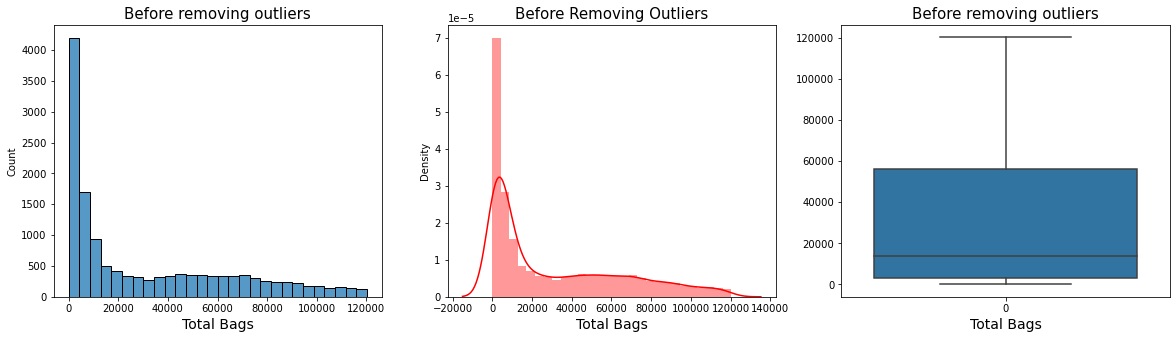

In [7992]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Total Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Total Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Total Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)
plt.show()

In [7993]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Total Bags'].mean())
print('Median of the column:----->',df['Total Bags'].median())
print('Mode of the column:----->',st.mode(df['Total Bags']))
print('std of the column:----->',df['Total Bags'].std())
#mean,median,mode values are not good right now because our column is left skewed

Mean of the column:-----> 31386.20375250633
Median of the column:-----> 13933.27
Mode of the column:-----> 300.0
std of the column:-----> 33819.59734773904


In [7994]:
#replace mode value to mean to improve normal curve
df['Total Bags'] = df['Total Bags'].replace(300.0, df['Total Bags'].mean())

In [7995]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Total Bags'].mean())
print('Median of the column:----->',df['Total Bags'].median())
print('Mode of the column:----->',st.mode(df['Total Bags']))
print('std of the column:----->',df['Total Bags'].std())
#mean,median,mode values are looking similar but it is not right at this time

Mean of the column:-----> 31397.334590286526
Median of the column:-----> 13960.060000000001
Mode of the column:-----> 31386.20375250633
std of the column:-----> 33814.47915592849


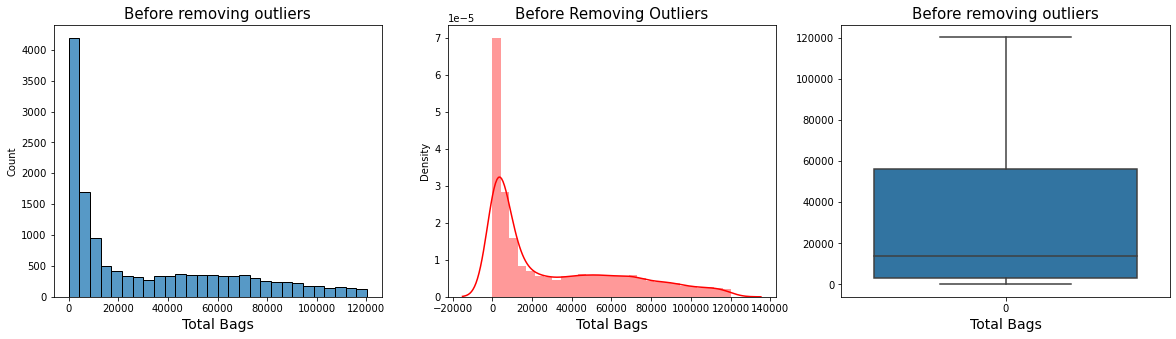

In [7996]:
#Visualization
#lets plot again to visualize the curve and skewness
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Total Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Total Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Total Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Total Bags', fontsize= 14)
plt.show()

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

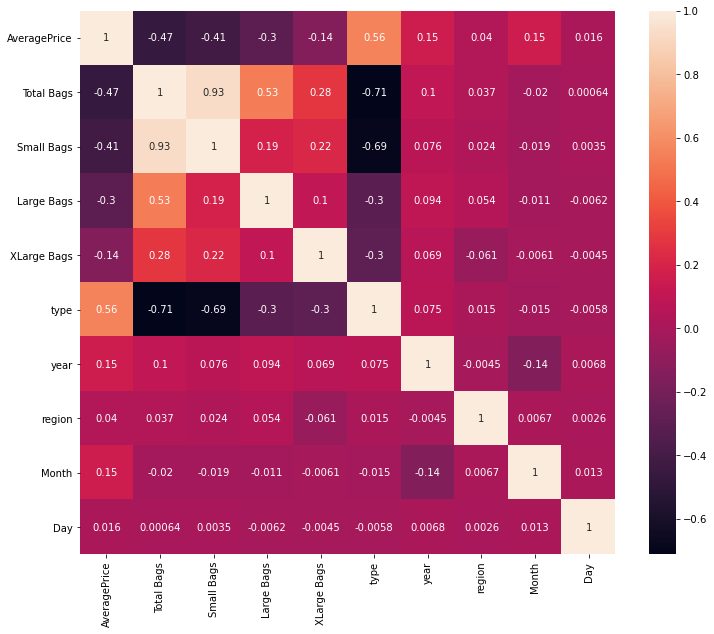

In [7997]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

In [7998]:
#We already drop approx 5000 rows in our dataset to reduce outliers for this column
#but our column is still left skewed
#this column is highly correlated with Small Bags column

In [7999]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (13964, 10)


In [8000]:
df.head()

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


# Columns6 : Small Bags

In [8001]:
df['Small Bags'].unique()#check the unique value in our dataset

array([ 8603.62,  9408.07,  8042.21, ...,  9351.8 , 10919.54, 11988.14])

In [8002]:
df['Small Bags'].describe()#check the mean, std, iqr and quartile range parameters

count     13964.000000
mean      24436.543570
std       28686.329757
min           0.000000
25%        1555.837500
50%        9874.570000
75%       43044.860000
max      119843.010000
Name: Small Bags, dtype: float64

In [8003]:
df['Small Bags'].all()#check the zero value

False

In [8004]:
df['Small Bags'] = df['Small Bags'].replace(0.0, df['Small Bags'].mean())

In [8005]:
df['Small Bags'].all()#check the zero value

True

In [8006]:
df['Small Bags'].value_counts()#check the number of counts for particular value

24436.54357    144
203.33000       11
223.33000       10
533.33000       10
103.33000        8
              ... 
71573.43000      1
13759.40000      1
21066.24000      1
7620.35000       1
2588.19000       1
Name: Small Bags, Length: 13052, dtype: int64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

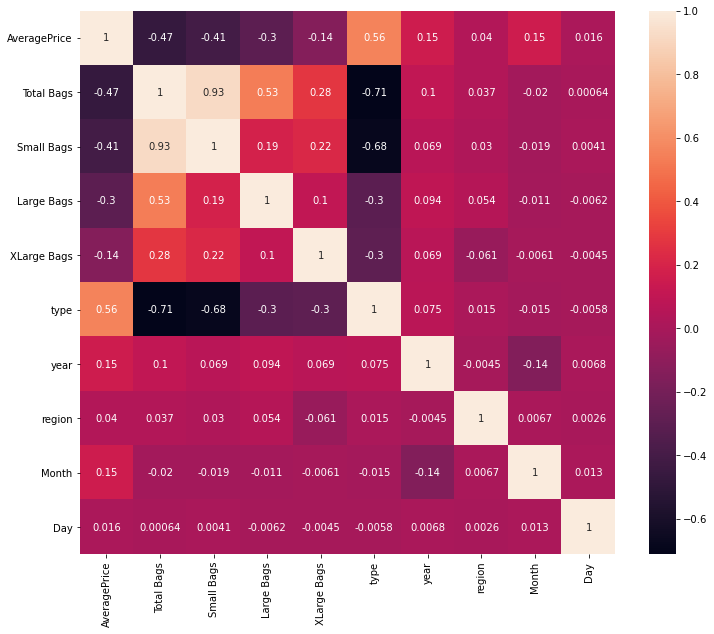

In [8007]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

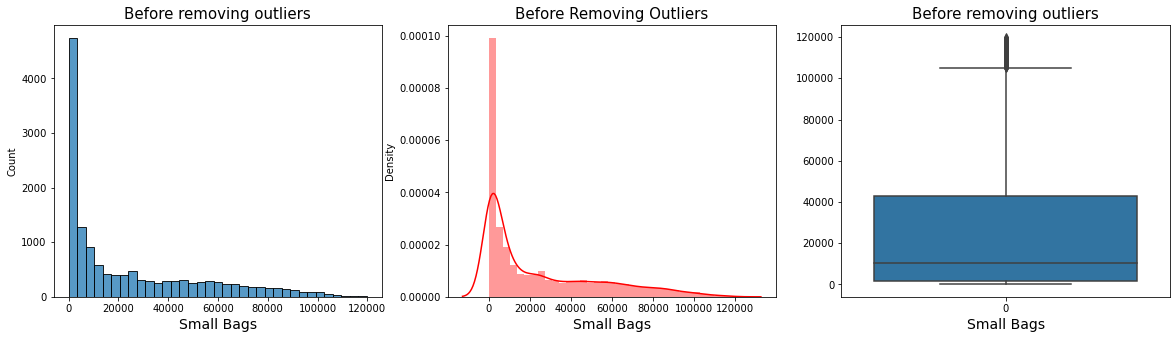

In [8008]:
#Visualization
#lets plot again to visualize the curve and skewness
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Small Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Small Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Small Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Small Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Small Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Small Bags', fontsize= 14)
plt.show()

In [8009]:
#This column is highly correlated with Total Bags column
#It is highly left skewed

In [8010]:
#We drop this column because it is highly correlated
df.drop(columns = ['Small Bags'], inplace = True)

In [8011]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (13964, 9)


# Columns7 : Large Bags

In [8012]:
df['Large Bags'].unique()#check the unique value in our dataset

array([ 93.25,  97.49, 103.14, ..., 324.8 ,  42.31,  26.01])

In [8013]:
df['Large Bags'].all()#check the zero value

False

In [8014]:
df['Large Bags'].value_counts()#check the number of counts for particular value

0.00        2342
3.33         187
6.67          78
10.00         47
4.44          38
            ... 
241.29         1
3194.70        1
264.31         1
1835.39        1
27044.26       1
Name: Large Bags, Length: 10847, dtype: int64

In [8015]:
df['Large Bags'] = df['Large Bags'].replace(0.0, df['Large Bags'].mean())

In [8016]:
df['Large Bags'].all()#check the zero value

True

In [8017]:
df['Large Bags'].describe()#check the mean, std, iqr and quartile range parameters

count     13964.000000
mean       7648.474101
std       12114.726848
min           0.970000
25%         509.282500
50%        3558.130000
75%        6549.938203
max      115992.660000
Name: Large Bags, dtype: float64

correlation between the Features and with label:-----> (9, 9)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

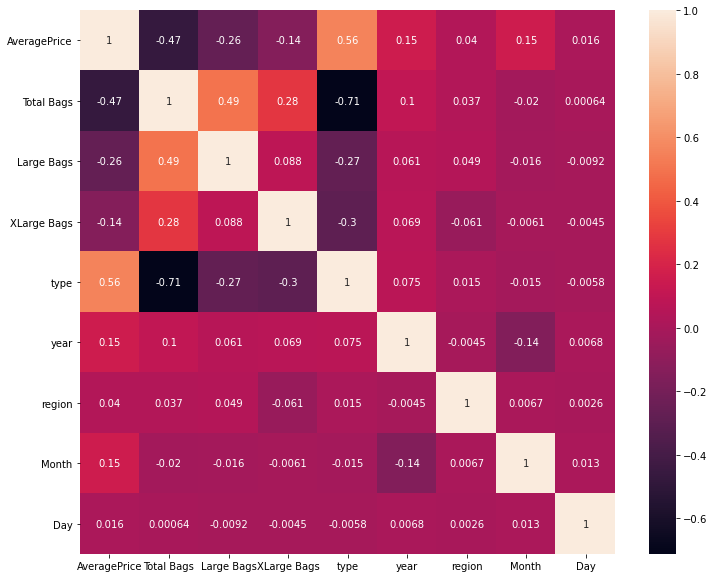

In [8018]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

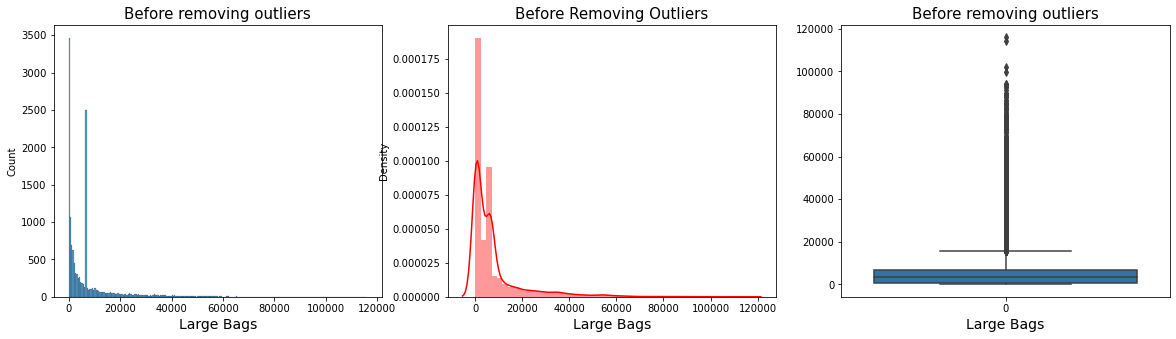

In [8019]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Large Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Large Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Large Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)
plt.show()

In [8020]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Large Bags'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Large Bags'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Large Bags'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['Large Bags'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 6040.723203236841

 **************************************************
Higher range:-
 (array([   52,    54,    56, ..., 13895, 13900, 13901], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [8021]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (13964, 9)
New Shape:------>  (12033, 9)


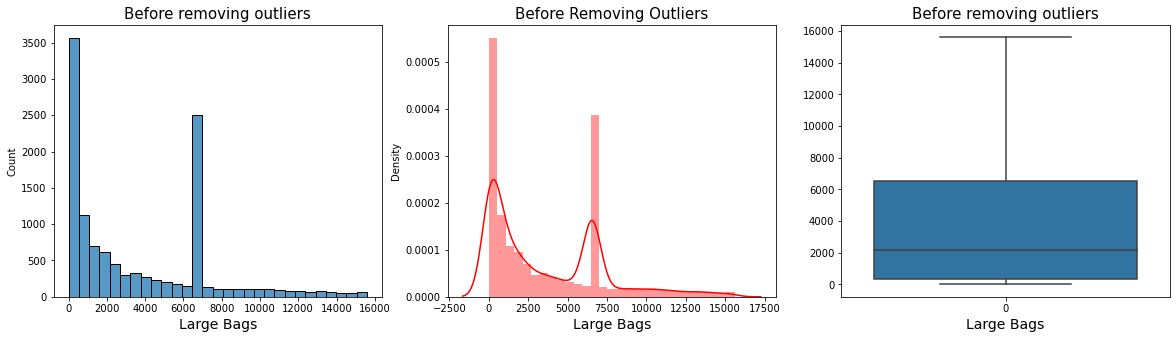

In [8022]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Large Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Large Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Large Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)
plt.show()

In [8023]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Large Bags'].mean())
print('Median of the column:----->',df['Large Bags'].median())
print('Mode of the column:----->',st.mode(df['Large Bags']))
print('std of the column:----->',df['Large Bags'].std())
#mean,median,mode values are still very high

Mean of the column:-----> 3587.9703716431823
Median of the column:-----> 2162.28
Mode of the column:-----> 6549.938203236841
std of the column:-----> 3652.078716026056


In [8024]:
#Again, Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Large Bags'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Large Bags'], 50,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Large Bags'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['Large Bags'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 1826.2500000000002

 **************************************************
Higher range:-
 (array([   52,    53,    54, ..., 11971, 11972, 12019], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [8025]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (12033, 9)
New Shape:------>  (7621, 9)


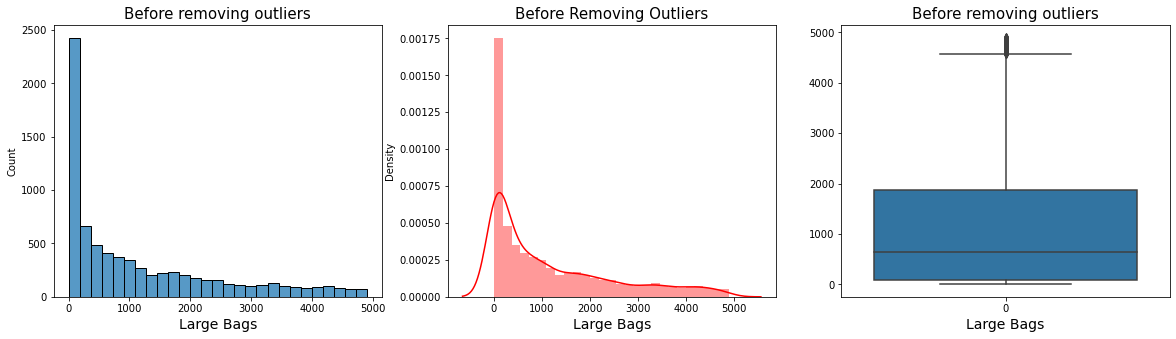

In [8026]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Large Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Large Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Large Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)
plt.show()

In [8027]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Large Bags'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Large Bags'], 65,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Large Bags'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['Large Bags'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 1160.3

 **************************************************
Higher range:-
 (array([  88,   89,   91,   92,  101,  154,  156,  157,  160,  161,  162,
        163,  167,  170,  172,  174,  176,  178,  183,  203,  204,  205,
        208,  211,  212,  216,  220,  221,  222,  225,  226,  228,  231,
        232,  233,  234,  235,  236,  237,  238,  239,  240,  241,  244,
        245,  246,  247,  249,  250,  251,  252,  253,  254,  257,  258,
        259,  267,  272,  277,  314,  339,  346,  348,  349,  350,  351,
        352,  353,  354,  356,  357,  358,  360,  361,  362,  364,  365,
        366,  367,  368,  369,  370,  371,  380,  403,  422,  433,  434,
        435,  436,  437,  438,  448,  449,  451,  456,  459,  464,  465,
        470,  483,  498,  499,  500,  501,  502,  503,  504,  505,  506,
        507,  508,  509,  510,  511,  518,  519,  520,  521,  522,  523,
        524,  525,  527,  528,  529,  530,  531,  532,  533,  534,  535,
        536,  539,

In [8028]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (7621, 9)
New Shape:------>  (6632, 9)


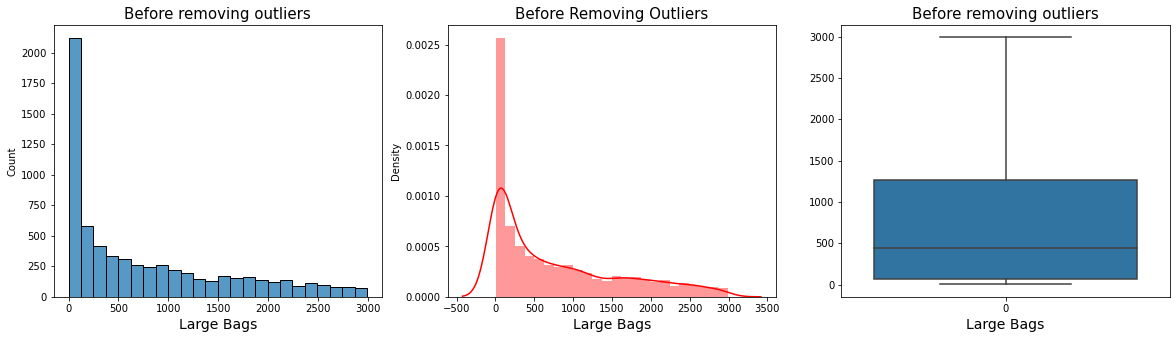

In [8029]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Large Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Large Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Large Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)
plt.show()

In [8030]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Large Bags'].mean())
print('Median of the column:----->',df['Large Bags'].median())
print('Mode of the column:----->',st.mode(df['Large Bags']))
print('std of the column:----->',df['Large Bags'].std())
#mean,median,std values are still very high and mode value is very low

Mean of the column:-----> 766.3027050663468
Median of the column:-----> 444.94
Mode of the column:-----> 3.33
std of the column:-----> 822.567203973873


In [8031]:
df['Large Bags'] = df['Large Bags'].replace(3.33, df['Large Bags'].mean())

In [8032]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Large Bags'].mean())
print('Median of the column:----->',df['Large Bags'].median())
print('Mode of the column:----->',st.mode(df['Large Bags']))
print('std of the column:----->',df['Large Bags'].std())
#mean,median,mode values are still very high but looking little bit good

Mean of the column:-----> 787.8159583605833
Median of the column:-----> 515.555
Mode of the column:-----> 766.3027050663468
std of the column:-----> 812.2422143561168


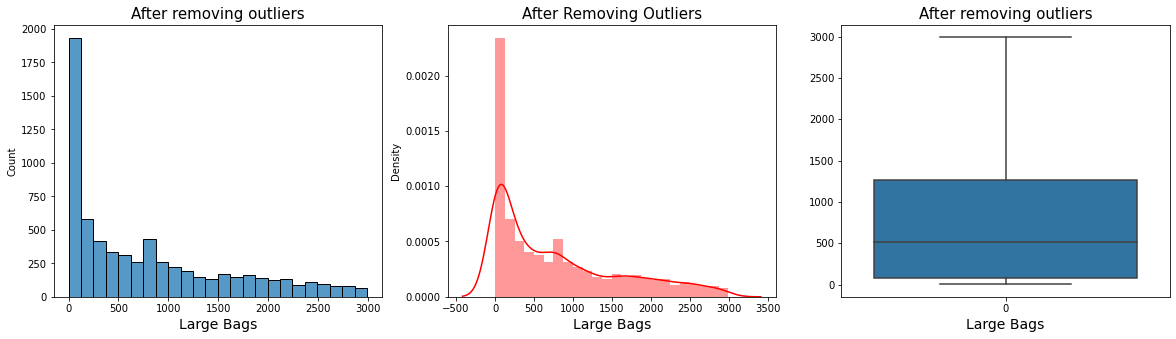

In [8033]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Large Bags']) #visualize the outliers by using histplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Large Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Large Bags']) #visualize the outliers by using boxplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('Large Bags', fontsize= 14)
plt.show()

correlation between the Features and with label:-----> (9, 9)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

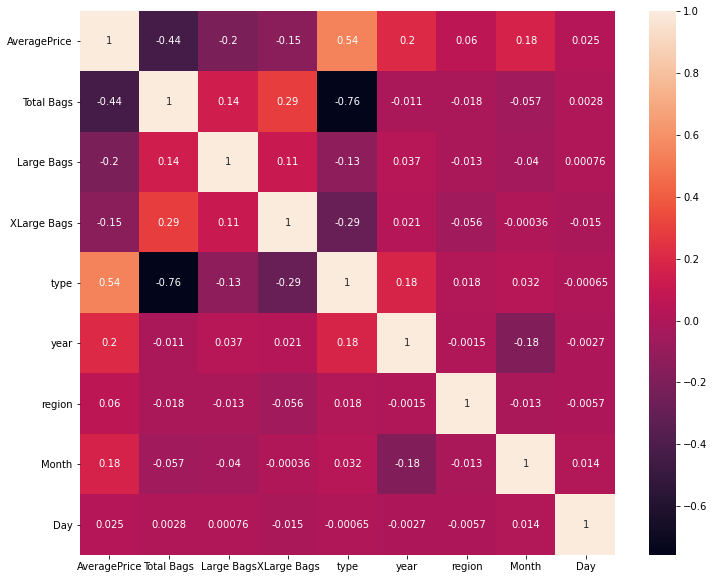

In [8034]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

In [8035]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (6632, 9)


# Columns8 : XLarge Bags

In [8036]:
df['XLarge Bags'].unique()#check the unique value in our dataset

array([0.000000e+00, 3.333000e+01, 1.041700e+02, 3.522000e+01,
       2.412000e+01, 2.096000e+01, 1.296000e+01, 4.265100e+02,
       1.022900e+02, 4.071000e+01, 1.620000e+00, 6.470000e+00,
       1.937000e+01, 1.458300e+02, 4.306000e+01, 4.028000e+01,
       5.000000e+01, 9.861000e+01, 1.005667e+04, 1.676000e+01,
       5.610000e+00, 7.537900e+02, 2.974560e+03, 1.674840e+03,
       4.501470e+03, 8.659000e+01, 4.388700e+02, 3.729000e+02,
       5.015300e+02, 1.363390e+03, 2.120090e+03, 8.748000e+01,
       3.620000e+00, 9.040000e+00, 3.080000e+01, 1.039400e+02,
       1.430000e+01, 3.905000e+01, 5.310000e+00, 3.897000e+01,
       1.698160e+03, 8.103000e+02, 2.099600e+03, 2.161320e+03,
       5.726400e+02, 3.150270e+03, 7.294700e+02, 3.189340e+03,
       1.843400e+02, 7.593000e+01, 3.754000e+02, 4.470470e+03,
       4.240190e+03, 8.696100e+02, 5.976300e+02, 5.634600e+02,
       2.143000e+01, 6.846000e+01, 1.222900e+02, 2.192000e+02,
       1.236892e+04, 8.377980e+03, 6.342660e+03, 2.2744

In [8037]:
df['XLarge Bags'].all()#check the zero value

False

In [8038]:
df['XLarge Bags'] = df['XLarge Bags'].replace(0.0, df['XLarge Bags'].mean())

In [8039]:
df['XLarge Bags'].value_counts()#check the number of counts for particular value

288.730911     5685
6.670000          4
5.000000          3
10.000000         3
77.780000         3
               ... 
1205.000000       1
8377.980000       1
1760.000000       1
2365.000000       1
1933.340000       1
Name: XLarge Bags, Length: 906, dtype: int64

In [8040]:
df['XLarge Bags'].describe()#check the mean, std, iqr and quartile range parameters

count     6632.000000
mean       536.233207
std       1597.560374
min          1.450000
25%        288.730911
50%        288.730911
75%        288.730911
max      43708.820000
Name: XLarge Bags, dtype: float64

correlation between the Features and with label:-----> (9, 9)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

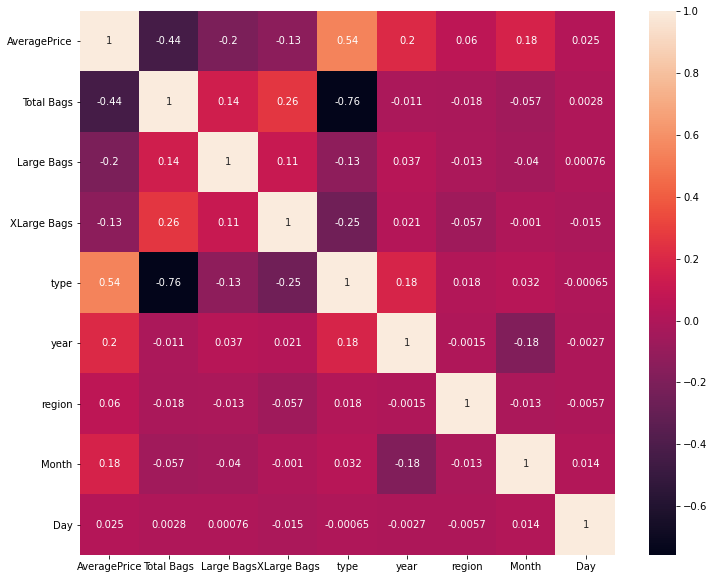

In [8041]:
# Check the correlation.
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

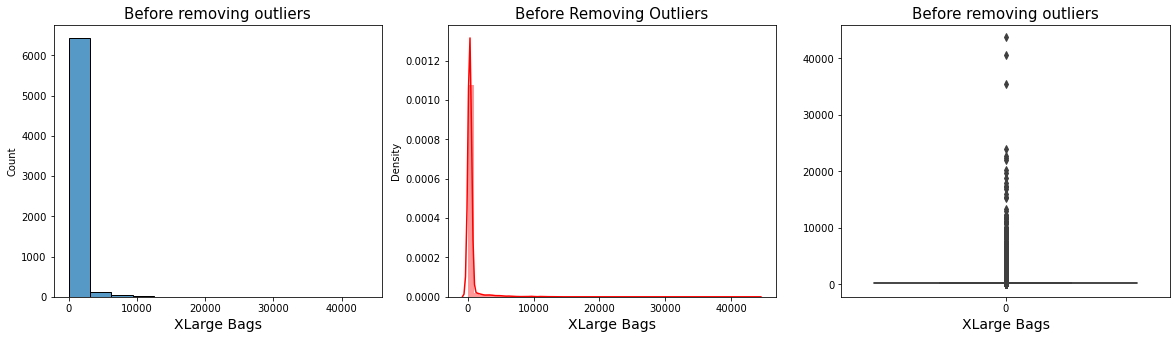

In [8042]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['XLarge Bags']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('XLarge Bags', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['XLarge Bags'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('XLarge Bags', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['XLarge Bags']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('XLarge Bags', fontsize= 14)
plt.show()

In [8043]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['XLarge Bags'].mean())
print('Median of the column:----->',df['XLarge Bags'].median())
print('Mode of the column:----->',st.mode(df['XLarge Bags']))
print('std of the column:----->',df['XLarge Bags'].std())
#mean,median,mode values are still very high but looking little bit good

Mean of the column:-----> 536.2332068052511
Median of the column:-----> 288.7309107358262
Mode of the column:-----> 288.7309107358262
std of the column:-----> 1597.5603736237456


In [8044]:
#This column have lot of outliers which cannot be treated
#graph of this coloumn is highly left skewed
#mean, median, mode, std are very high and not good.

In [8045]:
#Too many outliers thats why we need to drop this column
df.drop(columns = ['XLarge Bags'], inplace = True)

In [8046]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (6632, 8)


# Columns9: type

In [8047]:
df['type'].unique()#check the unique value in our dataset

array([0, 1])

In [8048]:
df['type'].describe()#check the mean, std, iqr and quartile range parameters

count    6632.000000
mean        0.728589
std         0.444721
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: type, dtype: float64

In [8049]:
df['type'].value_counts()#check the number of counts for particular value

1    4832
0    1800
Name: type, dtype: int64

correlation between the Features and with label:-----> (8, 8)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

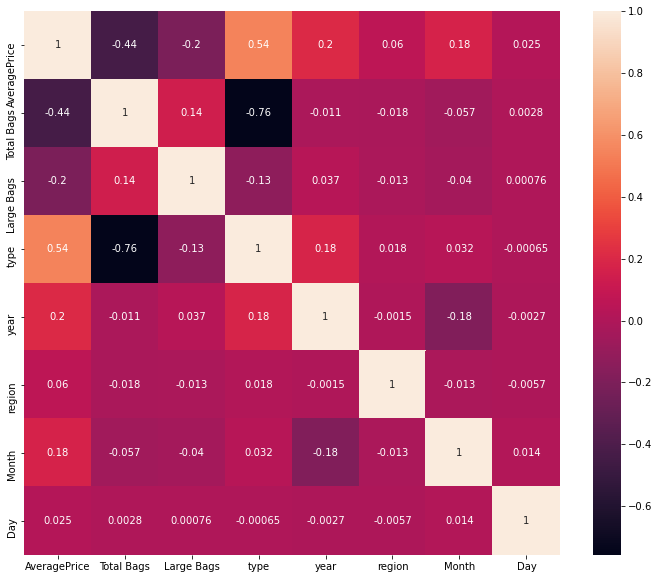

In [8050]:
# Check the correlation.
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

Text(6.799999999999997, 0.5, 'AveragePrice')

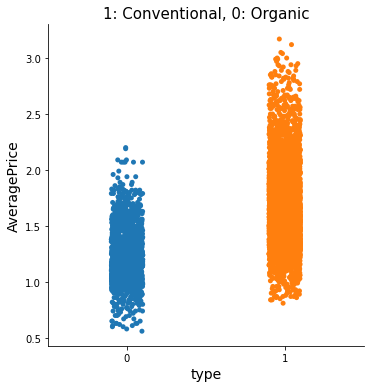

In [8051]:
#visualize this column by categorical plot
sns.catplot(x= 'type', y = 'AveragePrice', data=df)
plt.title('1: Conventional, 0: Organic', fontsize = 15)
plt.xlabel('type', fontsize = 14)
plt.ylabel('AveragePrice', fontsize = 14)

In [8052]:
#We can see that, Categorical type is higher than organic as compared to Average price.

In [8053]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (6632, 8)


# Columns10 :year

In [8054]:
df['year'].unique()#check the unique value in our dataset

array([2015, 2016, 2017, 2018], dtype=int64)

In [8055]:
df['year'].value_counts()#check the number of counts for particular value

2015    2135
2016    2078
2017    1995
2018     424
Name: year, dtype: int64

correlation between the Features and with label:-----> (8, 8)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

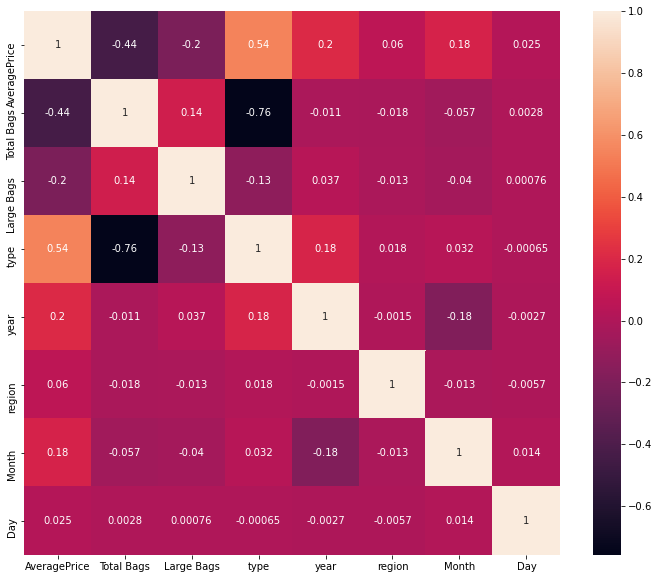

In [8056]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

Text(6.799999999999997, 0.5, 'AveragePrice')

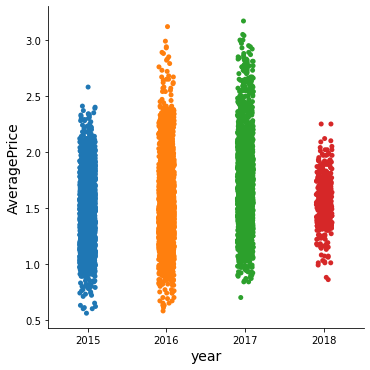

In [8057]:
#visualize this column by categorical plot
sns.catplot(x= 'year', y = 'AveragePrice', data=df)
plt.xlabel('year', fontsize = 14)
plt.ylabel('AveragePrice', fontsize = 14)

In [8058]:
#in 2017, the average price is high as compared to other years

In [8059]:
#We can see here, the price of conventional is higher in 2017 
# and for organic, the price is higher in 2015
df.groupby('year')['type'].value_counts()

year  type
2015  1       1357
      0        778
2016  1       1498
      0        580
2017  1       1581
      0        414
2018  1        396
      0         28
Name: type, dtype: int64

In [8060]:
#Average price of 2017 year is high
df.groupby('year')['AveragePrice'].mean()

year
2015    1.474023
2016    1.519673
2017    1.717113
2018    1.547995
Name: AveragePrice, dtype: float64

In [8061]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (6632, 8)


# Label2 :region

In [8062]:
df['region'].unique()#check the unique value in our dataset

array([ 0,  2,  3,  4,  5,  7,  8, 10, 13, 14, 16, 17, 21, 26, 27, 30, 33,
       34, 36, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 53, 32, 18,  1,  6,
        9, 11, 15, 19, 20, 22, 23, 24, 25, 28, 29, 31, 35, 44, 45, 46, 50,
       12, 52])

In [8063]:
df['region'].value_counts()#check the number of counts for particular value

37    285
3     249
38    240
42    217
47    213
17    209
16    206
39    202
49    175
33    170
10    163
40    161
44    160
21    159
13    157
23    154
34    150
4     149
53    147
19    146
5     141
0     134
14    128
8     126
7     126
48    124
2     121
26    117
11    113
27    112
28    110
24    106
32    100
1     100
50     99
22     96
31     95
18     94
6      88
20     84
9      83
45     82
30     79
12     78
41     75
29     69
46     61
36     54
43     51
35     41
25     23
15      9
52      1
Name: region, dtype: int64

In [8064]:
df['region'].describe()#check the mean, std, iqr and quartile range parameters

count    6632.000000
mean       25.847708
std        15.523345
min         0.000000
25%        12.000000
50%        26.000000
75%        39.000000
max        53.000000
Name: region, dtype: float64

correlation between the Features and with label:-----> (8, 8)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

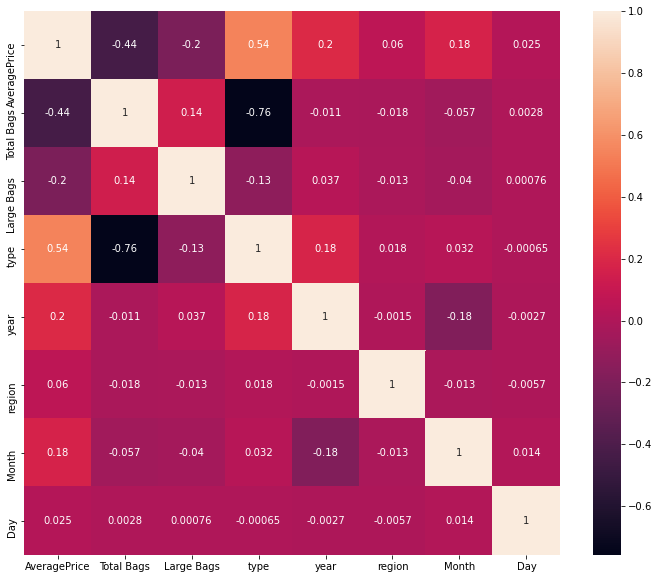

In [8065]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

# Column11: Month

In [8066]:
df['Month'].unique()#check the unique value in our dataset

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [8067]:
df['Month'].value_counts()#check the number of counts for particular value

1     689
3     638
2     629
11    584
10    575
12    538
8     530
7     524
5     503
4     501
9     480
6     441
Name: Month, dtype: int64

Text(6.799999999999997, 0.5, 'AveragePrice')

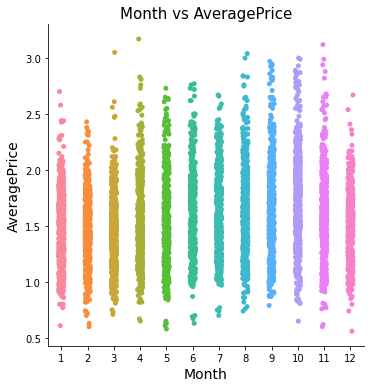

In [8068]:
#visaulize this column bys using catplot
sns.catplot(x= 'Month', y = 'AveragePrice', data=df)
plt.title('Month vs AveragePrice', fontsize = 15)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('AveragePrice', fontsize = 14)

Text(0, 0.5, 'AveragePrice')

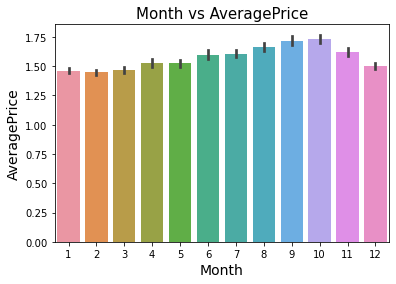

In [8069]:
#visualize it by barplot
sns.barplot(x= 'Month', y = 'AveragePrice', data=df)
plt.title('Month vs AveragePrice', fontsize = 15)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('AveragePrice', fontsize = 14)

In [8070]:
#we can see here, average price is higher in 9th and 10th month that is september and october

correlation between the Features and with label:-----> (8, 8)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

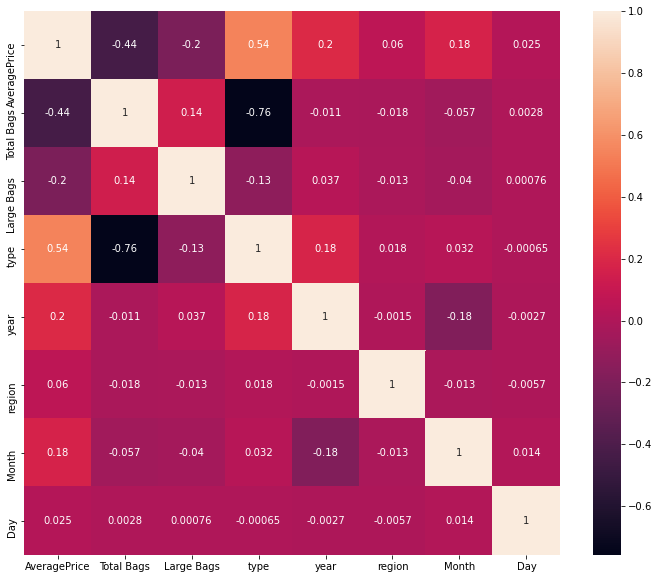

In [8071]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'Runs' and Label:- 'quality' is 0.43

# Column12: Day

In [8072]:
df['Day'].unique()#check the unique value in our dataset

array([27, 20, 13,  6, 29, 22, 15,  8,  1, 25, 18, 11,  4, 30, 23, 16,  9,
        2, 26, 19, 12,  5, 28, 21, 14,  7, 31, 24, 17, 10,  3],
      dtype=int64)

In [8073]:
df['Day'].value_counts()#check the number of counts for particular value

18    290
25    278
11    271
4     262
15    257
22    256
8     253
5     239
1     234
26    234
19    233
12    232
10    229
3     227
24    223
17    220
29    212
6     212
13    205
27    198
21    197
28    194
20    189
14    183
30    170
7     170
2     159
31    154
23    152
9     150
16    149
Name: Day, dtype: int64

Text(0, 0.5, 'AveragePrice')

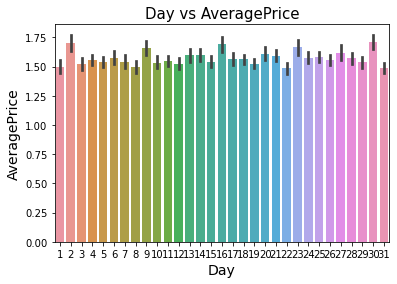

In [8074]:
#visualize it by barplot
sns.barplot(x= 'Day', y = 'AveragePrice', data=df)
plt.title('Day vs AveragePrice', fontsize = 15)
plt.xlabel('Day', fontsize = 14)
plt.ylabel('AveragePrice', fontsize = 14)

correlation between the Features and with label:-----> (8, 8)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

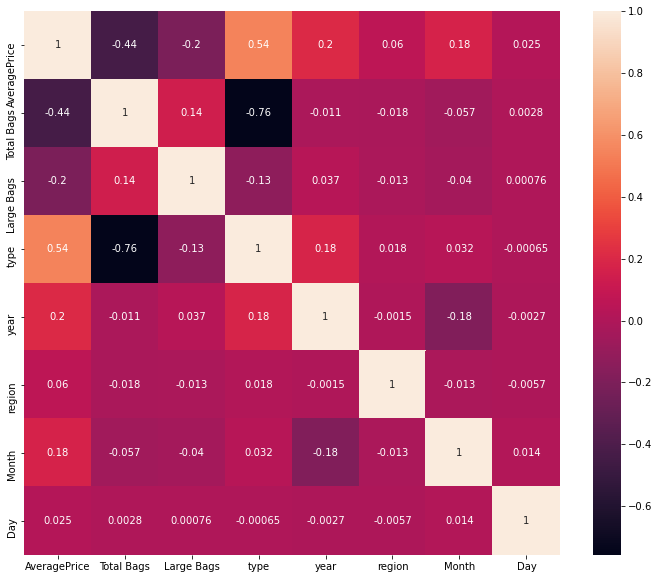

In [8075]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'Runs' and Label:- 'quality' is 0.43

# Label1: AveragePrice

In [8076]:
df['AveragePrice'].unique()#check the unique value in our dataset

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 1.04, 0.97, 1.03, 1.09,
       1.01, 0.94, 1.1 , 1.15, 1.14, 0.91, 1.18, 1.25, 1.36, 1.3 , 1.29,
       1.54, 1.59, 1.56, 1.47, 1.42, 1.41, 1.44, 1.39, 1.4 , 1.5 , 1.52,
       0.96, 1.21, 1.  , 0.89, 0.95, 0.92, 0.88, 1.38, 0.9 , 0.8 , 0.56,
       0.77, 0.62, 0.6 , 0.83, 0.65, 0.74, 0.78, 0.71, 0.63, 0.61, 1.48,
       1.49, 1.55, 1.58, 1.53, 1.57, 1.51, 0.85, 0.81, 0.76, 0.82, 0.79,
       0.75, 0.73, 0.84, 0.72, 1.62, 1.63, 1.46, 1.61, 0.7 , 0.69, 0.67,
       0.58, 0.86, 1.67, 1.66, 1.82, 2.07, 1.84, 1.8 , 1.83, 1.7 , 1.6 ,
       1.68, 1.81, 1.78, 1.69, 1.72, 1.89, 0.87, 1.79, 1.75, 1.94, 2.2 ,
       1.87, 1.64, 1.65, 1.71, 1.96, 2.19, 2.09, 1.99, 1.74, 1.85, 1.76,
       1.77, 1.86, 1.93, 1.9 , 1.98, 1.88, 2.01, 2.04, 2.  , 1.95, 2.05,
       2.02, 2.28, 2.35, 2.29, 1.91, 2.15, 2.08, 2.

In [8077]:
df['AveragePrice'].value_counts()#check the number of counts for particular value

1.59    89
1.49    86
1.36    84
1.54    80
1.51    79
        ..
3.04     1
2.71     1
3.17     1
2.80     1
0.69     1
Name: AveragePrice, Length: 237, dtype: int64

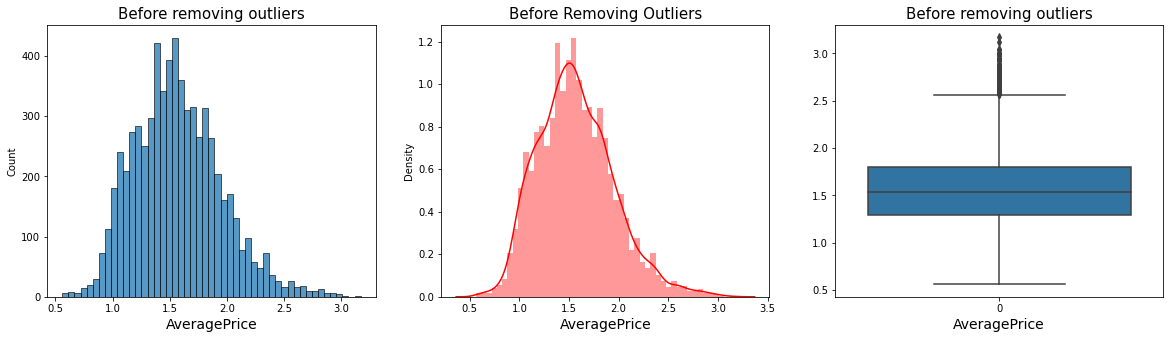

In [8078]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['AveragePrice']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('AveragePrice', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['AveragePrice'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('AveragePrice', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['AveragePrice']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('AveragePrice', fontsize= 14)
plt.show()

In [8079]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['AveragePrice'], 35,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['AveragePrice'], 73,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['AveragePrice'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['AveragePrice'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.3800000000000001

 **************************************************
Higher range:-
 (array([1900, 2199, 2200, 2202, 2203, 2865, 3338, 3593, 3594, 3595, 3596,
       3598, 3599, 3606, 3612, 3613, 3616, 3750, 3751, 3786, 3973, 3975,
       3976, 3980, 3982, 3987, 3988, 3990, 4073, 4075, 4114, 4115, 4118,
       4119, 4120, 4198, 4323, 4324, 4325, 4326, 4342, 4367, 4368, 4369,
       4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4383,
       4394, 4400, 4490, 4492, 4630, 4631, 4632, 4633, 4634, 4667, 4668,
       4728, 4729, 4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4848,
       4849, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886,
       4891, 4892, 4895, 5106, 5107, 5108, 5110, 5161, 5163, 5164, 5165,
       5167, 5168, 5173, 5175, 5176, 5177, 5178, 5179, 5257, 5258, 5259,
       5260, 5261, 5262, 5263, 5304, 5305, 5306, 5307, 5308, 5354, 5428,
       5444, 5445, 5446, 5450, 5451, 5452, 5558, 5560, 5562, 5599, 5601,
      

In [8080]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (6632, 8)
New Shape:------>  (6354, 8)


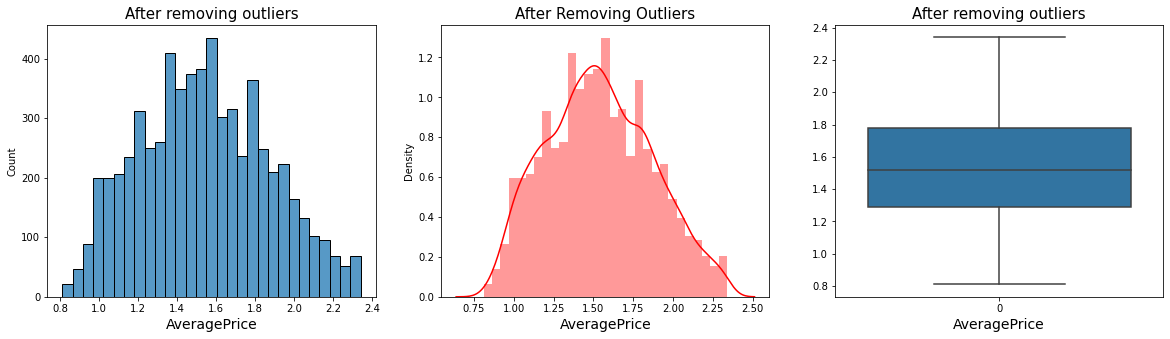

In [8081]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['AveragePrice']) #visualize the outliers by using histplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('AveragePrice', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['AveragePrice'], color='r') #visualize the normalization curve by using distplot
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('AveragePrice', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['AveragePrice']) #visualize the outliers by using boxplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('AveragePrice', fontsize= 14)
plt.show()

In [8082]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['AveragePrice'].mean())
print('Median of the column:----->',df['AveragePrice'].median())
print('Mode of the column:----->',st.mode(df['AveragePrice']))
print('std of the column:----->',df['AveragePrice'].std())
#mean,median,mode values are good now

Mean of the column:-----> 1.5379666351904324
Median of the column:-----> 1.52
Mode of the column:-----> 1.59
std of the column:-----> 0.33060965414935783


In [8083]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (6354, 8)


correlation between the Features and with label:-----> (8, 8)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

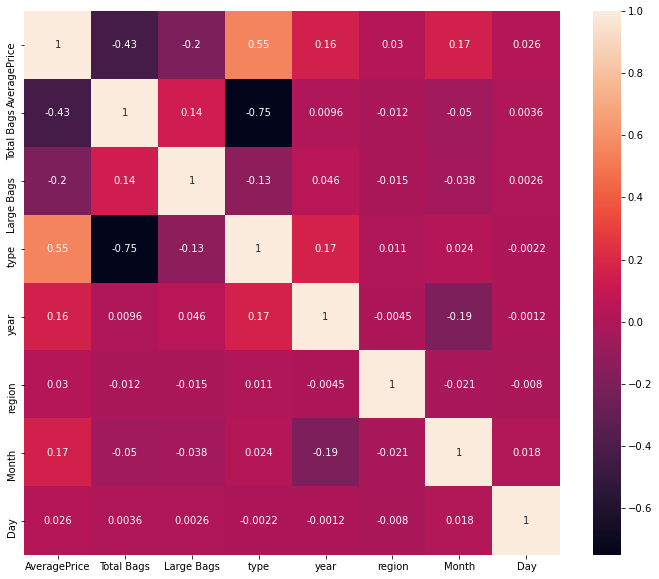

In [8084]:
# Check the correlation 
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

In [8085]:
#split x and y
x = df.drop(['AveragePrice'], axis=1)
y=df.AveragePrice

In [8086]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[-0.47726437, -0.86741376, -1.62391261, ..., -1.66102646,
         1.59108256,  1.28320324],
       [-0.44962382, -0.86222415, -1.62391261, ..., -1.66102646,
         1.59108256,  0.48577525],
       [-0.496115  , -0.85530875, -1.62391261, ..., -1.66102646,
         1.59108256, -0.31165275],
       ...,
       [-0.45343311, -0.9297625 ,  0.61579668, ...,  1.76983199,
        -1.4642261 ,  0.59969353],
       [-0.39958583, -0.92035022,  0.61579668, ...,  1.76983199,
        -1.4642261 , -0.19773446],
       [-0.36388167, -0.94971312,  0.61579668, ...,  1.76983199,
        -1.4642261 , -0.99516246]])

In [8087]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,2.405190,Total Bags
1,1.024890,Large Bags
2,2.474573,type
3,1.118474,year
4,1.000971,region
5,1.042573,Month
6,1.000402,Day


In [8088]:
#less multicollinearity between features.

In [8089]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [8090]:
y_train.head()

13666    2.18
836      1.17
4592     1.23
12182    1.59
11181    1.33
Name: AveragePrice, dtype: float64

# LinearRegression

In [8091]:
#Model instantiating and training
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [8092]:
#How much my model learn ( model confidence)
lr.score(x_train, y_train)

0.3494983454680748

In [8093]:
#Let's check how well model fits the test data
lr.score(x_test,y_test)

0.37556757396201856

In [8094]:
y_pred = lr.predict(x_test)

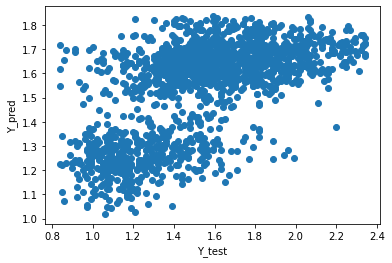

In [8095]:
#plot the actual and predicted value
plt.scatter(y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [8096]:
#calculate Mean absolute error
from sklearn import metrics
y_pred = lr.predict(x_test)
print('MAE:--------->',mean_absolute_error(y_test, y_pred))
#calculate mean squared error
print('MSE:----------->',mean_squared_error(y_test,y_pred))
#calculate root mean square error
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:---------> 0.20819899368962097
MSE:-----------> 0.0674254312826308
RSME:---------> 0.2596640739159555


In [8097]:
#RSME score is less but because of accuracy this model should not be our best model

# Lasso Regression

In [8098]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [8099]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

In [8100]:
#train the model
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [8101]:
#best alpha parameter
alpha = lassocv.alpha_
alpha

2.5953294711398496e-06

In [8102]:
#fit the data
lasso_reg = Lasso(alpha)

In [8103]:
lasso_reg.fit(x_train,y_train) #train the data

Lasso(alpha=2.5953294711398496e-06)

In [8104]:
lasso_reg.score(x_test,y_test) #get the score of test data

0.3755680523726246

In [8105]:
#Accuracy is still less

# Ridge Regressor

In [8106]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)

In [8107]:
#train the data
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [8108]:
#best alpha parameter
ridgecv.alpha_

0.001

In [8109]:
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [8110]:
ridge_model.score(x_test,y_test) #get the score

0.3755675690992465

In [8111]:
#accuracy is still less

# Decision Tree Regressor

In [8112]:
from sklearn.tree import DecisionTreeRegressor #import library

In [8113]:
dt=DecisionTreeRegressor()

In [8114]:
dt.fit(x_train,y_train) #train the data

DecisionTreeRegressor()

In [8115]:
dt.score(x_train,y_train) #get the score of train data

1.0

In [8116]:
dt.score(x_test,y_test) #get the score of test data

0.5675249705426768

In [8117]:
y_pred = dt.predict(x_test)

In [8118]:
#calculate Mean absolute error
from sklearn import metrics
y_pred = dt.predict(x_test)
print('MAE:--------->',mean_absolute_error(y_test, y_pred))
#calculate mean squared error
print('MSE:----------->',mean_squared_error(y_test,y_pred))
#calculate root mean square error
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:---------> 0.1514474512271869
MSE:-----------> 0.04669811202013844
RSME:---------> 0.21609745954114878


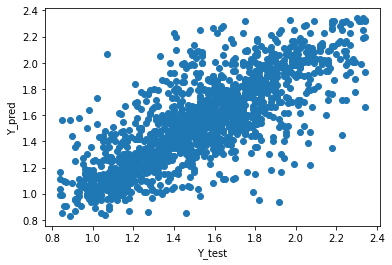

In [8119]:
#plot the actual and predicted value
plt.scatter(y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [8120]:
#Accuracy of this model is not bad
#RSME score is less
#by y_test and y_pred, we got approximately linear curve
#it is not good to select this model as a best model

# RandomForest Regressor

In [8121]:
from sklearn.ensemble import RandomForestRegressor #import library

In [8122]:
rd = RandomForestRegressor()

In [8123]:
rd.fit(x_train,y_train) #train the model

RandomForestRegressor()

In [8124]:
rd.score(x_train,y_train) #get the score of train data

0.9668867168953849

In [8125]:
rd.score(x_test,y_test) #get the score of test data

0.7773176369295931

In [8126]:
y_pred = rd.predict(x_test)

In [8127]:
#calculate Mean absolute error
from sklearn import metrics
y_pred = rd.predict(x_test)
print('MAE:--------->',mean_absolute_error(y_test, y_pred))
#calculate mean squared error
print('MSE:----------->',mean_squared_error(y_test,y_pred))
#calculate root mean square error
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:---------> 0.11433297671491502
MSE:-----------> 0.0240449626620516
RSME:---------> 0.1550643823128045


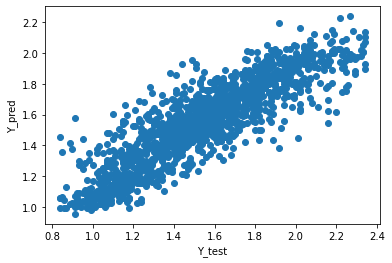

In [8128]:
#plot the actual and predicted value
plt.scatter(y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [8129]:
#Accuracy score is better than linear regression and decision tree
#RSME score is also less
#we got a better linear curve as compared to other models

# Ada Boost regressor

In [8130]:
ada = AdaBoostRegressor() #using this to improve accuracy

In [8131]:
ada_model= ada.fit(x_train,y_train) # fit the data

In [8132]:
y_pred = ada_model.predict(x_test) #predict it

In [8133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test,y_pred) #get the r2score

0.4200764232242745

In [8134]:
#Accuracy is less than random forest

# Using GridSearchCV by using LinearRegression as a estimator

In [8135]:
lr = LinearRegression()

In [8136]:
params = {'n_estimators': [40,47,49,50], 'learning_rate' :[.30,.40,.45]}

In [8137]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(), cv =5, param_distributions = params ) 
#using randomsearchCv

In [8138]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [8139]:
rnd_srch.best_estimator_ 

AdaBoostRegressor(learning_rate=0.4)

In [8140]:
ada = AdaBoostRegressor( base_estimator = lr, learning_rate = 0.45, n_estimators = 47)

In [8141]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.45,
                  n_estimators=47)

In [8142]:
y_pred = ada.predict(x_test) #predict it

In [8143]:
r2_score(y_test,y_pred) #get the score

0.36618852648390976

In [8144]:
#Accuracy score is still less

# Using GridSearchCV by using DecisionTree as a estimator

In [8145]:
dt = DecisionTreeRegressor() #now by using decision tree

In [8146]:
ada = AdaBoostRegressor( base_estimator = dt, learning_rate = 0.45, n_estimators = 47)

In [8147]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.45,
                  n_estimators=47)

In [8148]:
y_pred = ada.predict(x_test) #predict it

In [8149]:
r2_score(y_test,y_pred) #get the score

0.7850997761399249

In [8150]:
#Now, Accuracy score is improved 

# XGB Boost

In [8151]:
import xgboost as xgb #import libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8152]:
xgbr = xgb.XGBRegressor()  #to improve accuracy
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
r2_score(y_test, y_pred)

0.7984572311939339

In [8153]:
#Accuarcy score is better than other models

# GradientBoostingRegressor

In [8154]:
gradientregressor = GradientBoostingRegressor(max_depth=3, n_estimators=6, learning_rate=.4) 
#using GBR

In [8155]:
gbr = gradientregressor.fit(x_train,y_train) #fit the data

In [8156]:
r2_score(y_test,y_pred) #predict it 

0.7984572311939339

In [8157]:
#accuracy score is same as XGB Boost accuracy score

In [8158]:
from sklearn.model_selection import GridSearchCV #import libraries

In [8159]:
#Using GridSearchCV for GBR to improve accuracy
grid_params = {
    'max_depth': range(4,12,2),
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_split': range(4,8,2)
}

In [8160]:
grid = GridSearchCV(gbr, param_grid = grid_params)

In [8161]:
grid.fit(x_train, y_train) #fit the data

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.4,
                                                 n_estimators=6),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [8162]:
grid.best_params_ # get the best parameters

{'learning_rate': 0.4, 'max_depth': 10, 'min_samples_split': 6}

In [8163]:
a = grid.best_estimator_

In [8164]:
a.fit(x_train,y_train) # fit the data

GradientBoostingRegressor(learning_rate=0.4, max_depth=10, min_samples_split=6,
                          n_estimators=6)

In [8165]:
y_pred = a.predict(x_test) # predict it

In [8166]:
r2_score(y_test, y_pred) # get the improved r2 score

0.745536738571932

In [8167]:
#we can say that XGB Boost is a best model 

# Now, we take 'region' as a Label and solve it as a classifier

In [8168]:
df.head()

,AveragePrice,Total Bags,Large Bags,type,year,region,Month,Day
0,1.33,8696.87,93.25,0,2015,0,12,27
1,1.35,9505.56,97.49,0,2015,0,12,20
2,0.93,8145.35,103.14,0,2015,0,12,13
3,1.08,5811.16,133.76,0,2015,0,12,6
4,1.28,6183.95,197.69,0,2015,0,11,29


In [8169]:
#split x and y
x = df.drop(['region'], axis=1)
y=df.region

In [8170]:
#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.62908932, -0.47726437, -0.86741376, ..., -1.16431684,
         1.59108256,  1.28320324],
       [-0.56859026, -0.44962382, -0.86222415, ..., -1.16431684,
         1.59108256,  0.48577525],
       [-1.83907056, -0.496115  , -0.85530875, ..., -1.16431684,
         1.59108256, -0.31165275],
       ...,
       [ 1.00438536, -0.45343311, -0.9297625 , ...,  2.03692471,
        -1.4642261 ,  0.59969353],
       [ 1.18588254, -0.39958583, -0.92035022, ...,  2.03692471,
        -1.4642261 , -0.19773446],
       [ 0.24814708, -0.36388167, -0.94971312, ...,  2.03692471,
        -1.4642261 , -0.99516246]])

In [8171]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,1.552484,AveragePrice
1,2.409411,Total Bags
2,1.050614,Large Bags
3,2.817892,type
4,1.142134,year
5,1.086583,Month
6,1.001326,Day


In [8172]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [8173]:
y_train.head()

13666    33
836      16
4592     34
12182     4
11181    39
Name: region, dtype: int32

# Logistic Regression

In [8174]:
#Model instantiating and training
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [8175]:
#Train the model
log_reg.score(x_train, y_train)

0.20167890870933894

In [8176]:
#Let's check how well model fits the test data
log_reg.score(x_test,y_test)

0.19446192573945878

In [8177]:
#make predictions
pred_test= log_reg.predict(x_test)

In [8178]:
#Cross validation score for logistic regression
lr_cv = log_reg.predict(x_test)

lr_acc= accuracy_score(y_test,lr_cv)


for i in range (2,10):
    lr_score= cross_val_score(log_reg,x,y,cv=i)
    lr_sc=lr_score.mean()
    print( 'At CV ------',i)
    print("CV Score is -----",lr_sc*100)
    print("Accuracy Score is -----",lr_acc*100)
    print("\n")

At CV ------ 2
CV Score is ----- 4.280768020144791
Accuracy Score is ----- 19.44619257394588


At CV ------ 3
CV Score is ----- 5.193578847969783
Accuracy Score is ----- 19.44619257394588


At CV ------ 4
CV Score is ----- 6.294791965543971
Accuracy Score is ----- 19.44619257394588


At CV ------ 5
CV Score is ----- 5.712446644405484
Accuracy Score is ----- 19.44619257394588


At CV ------ 6
CV Score is ----- 6.185080264400377
Accuracy Score is ----- 19.44619257394588


At CV ------ 7
CV Score is ----- 5.837923763359314
Accuracy Score is ----- 19.44619257394588


At CV ------ 8
CV Score is ----- 5.885394388733109
Accuracy Score is ----- 19.44619257394588


At CV ------ 9
CV Score is ----- 6.1221277935158955
Accuracy Score is ----- 19.44619257394588




In [8179]:
#Accuracy of this model is not good

# Knn Classifier

In [8180]:
Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train) #train the model

KNeighborsClassifier()

In [8181]:
Classifier.score(x_train,y_train) #check how much our model learn

0.41133263378803775

In [8182]:
Classifier.score(x_test,y_test) #check the score

0.18628067967275017

In [8183]:
from sklearn.metrics import confusion_matrix, classification_report #import library

In [8184]:
knn = KNeighborsClassifier()

In [8185]:
knn.fit(x_train,y_train) #now train the data

KNeighborsClassifier()

In [8186]:
y_pred = knn.predict(x_test) #predict it

In [8187]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.18628067967275017

******************************************
Confusion_matrix:
 [[24  0  0 ...  0  0  0]
 [ 0  5  1 ...  0  0  0]
 [ 0  1  8 ...  0  0  0]
 ...
 [ 0  2  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.39      0.59      0.47        41
           1       0.07      0.29      0.11        17
           2       0.10      0.30      0.15        27
           3       0.17      0.30      0.22        60
           4       0.22      0.28      0.25        39
           5       0.18      0.21      0.19        39
           6       0.26      0.54      0.35        13
           7       0.06      0.15      0.09        27
           8       0.11      0.32      0.17        25
           9       0.10      0.09      0.09        23
          10       0.03      0.07      0.04        28
          11     

In [8188]:
#cross validation score to check if the model is overfitting
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([0.09126672, 0.08654603, 0.05743509, 0.05035405, 0.06771654])

In [8189]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean() 

0.07066368474200363

# Using gridSearchCV to improve score using knn as a estimator

In [8190]:
from sklearn.model_selection import GridSearchCV #import libraries

In [8191]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[12,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,12,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid)
gridsearch.fit(x_train,y_train) #train the model

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [12, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 12, 13]})

In [8192]:
gridsearch.best_params_ #get best parameters

{'algorithm': 'brute', 'leaf_size': 12, 'n_neighbors': 5}

In [8193]:
#put best params into knn
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size = 12, n_neighbors = 9) 

In [8194]:
knn.fit(x_train,y_train) #train the model

KNeighborsClassifier(algorithm='brute', leaf_size=12, n_neighbors=9)

In [8195]:
knn.score(x_train,y_train) #check the training score

0.3769150052465897

In [8196]:
knn.score(x_test,y_test) #check the score

0.19823788546255505

In [8197]:
y_pred = knn.predict(x_test) #predict it

In [8198]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.19823788546255505

******************************************
Confusion_matrix:
 [[25  1  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  1  9 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.48      0.61      0.54        41
           1       0.02      0.06      0.03        17
           2       0.12      0.33      0.18        27
           3       0.19      0.27      0.22        60
           4       0.26      0.23      0.25        39
           5       0.24      0.18      0.21        39
           6       0.21      0.46      0.29        13
           7       0.10      0.19      0.13        27
           8       0.15      0.40      0.22        25
           9       0.00      0.00      0.00        23
          10       0.07      0.18      0.11        28
          11     

# SVM

In [8199]:
from sklearn.svm import SVC #import libraries

In [8200]:
svc = SVC()

In [8201]:
svc.fit(x_train,y_train) #train the model

SVC()

In [8202]:
svc.score(x_train,y_train) #score of training data

0.3110178384050367

In [8203]:
svc.score(x_test,y_test) #check the score

0.236626809314034

In [8204]:
y_pred = svc.predict(x_test)

In [8205]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.236626809314034

******************************************
Confusion_matrix:
 [[28  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.51      0.68      0.58        41
           1       0.00      0.00      0.00        17
           2       0.16      0.19      0.17        27
           3       0.39      0.15      0.22        60
           4       0.39      0.33      0.36        39
           5       0.75      0.08      0.14        39
           6       0.38      0.46      0.41        13
           7       0.05      0.04      0.04        27
           8       0.40      0.32      0.36        25
           9       0.50      0.09      0.15        23
          10       0.08      0.07      0.08        28
          11       

# Using gridSearchCV to improve score using SVC as a estimator

In [8206]:
param_grid = {'C': [0.001,1,2,4,5,6,7,9,10],
             'gamma': [0.7,0.2,0.3,0.4,0.5,0.6,0.8],
             'kernel': ['rbf']}

In [8207]:
gridsearch = GridSearchCV(SVC(), param_grid)

In [ ]:
gridsearch.fit(x_train,y_train) #train the model

In [8209]:
gridsearch.best_params_ #get the best parameter

{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

In [8210]:
svc = SVC(C=1, gamma=0.2) #put the params in svm

In [8211]:
svc.fit(x_train,y_train) #train the model

SVC(C=1, gamma=0.2)

In [8212]:
svc.score(x_train,y_train) #get the score of training data

0.3320041972717733

In [8213]:
svc.score(x_test,y_test) #check the score

0.250471994965387

In [8214]:
y_pred = svc.predict(x_test)

In [8215]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.250471994965387

******************************************
Confusion_matrix:
 [[27  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.53      0.66      0.59        41
           1       0.00      0.00      0.00        17
           2       0.17      0.19      0.18        27
           3       0.40      0.17      0.24        60
           4       0.38      0.33      0.36        39
           5       0.80      0.10      0.18        39
           6       0.43      0.46      0.44        13
           7       0.03      0.04      0.04        27
           8       0.36      0.32      0.34        25
           9       0.22      0.09      0.12        23
          10       0.07      0.07      0.07        28
          11       

# RandomForestClassifier

In [8216]:
rf= RandomForestClassifier()

In [8217]:
rf.fit(x_train,y_train)#train the model

RandomForestClassifier()

In [8218]:
rf.score(x_train,y_train) # training data score

1.0

In [8219]:
rf.score(x_test,y_test) #testing data score

0.4197608558842039

In [8220]:
y_pred=rf.predict(x_test)

In [8221]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.4197608558842039

******************************************
Confusion_matrix:
 [[29  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  1]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 12]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        41
           1       0.12      0.12      0.12        17
           2       0.43      0.44      0.44        27
           3       0.49      0.53      0.51        60
           4       0.49      0.49      0.49        39
           5       0.52      0.31      0.39        39
           6       0.44      0.62      0.52        13
           7       0.34      0.48      0.40        27
           8       0.33      0.52      0.41        25
           9       0.23      0.13      0.17        23
          10       0.27      0.32      0.30        28
          11      

# Using gridSearchCV to improve score using RF as a estimator

In [8222]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

In [8223]:
grd = GridSearchCV(rf, param_grid=params)
grd.fit(x_train,y_train)
print('best_param - ', grd.best_params_) #get the best parameter

best_param -  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [8224]:
#Check the accuarcy of our model
clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rf_cfm = confusion_matrix(y_test, y_pred)

In [8225]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , rf_cfm)
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.3524229074889868

******************************************
Confusion_matrix:
 [[27  0  0 ...  0  0  1]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  1 ...  0  0  7]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.63      0.66      0.64        41
           1       0.09      0.12      0.10        17
           2       0.41      0.41      0.41        27
           3       0.45      0.33      0.38        60
           4       0.41      0.49      0.45        39
           5       0.64      0.23      0.34        39
           6       0.33      0.46      0.39        13
           7       0.29      0.41      0.34        27
           8       0.35      0.48      0.41        25
           9       0.10      0.04      0.06        23
          10       0.22      0.18      0.20        28
          11      

# Plot ROC/AUC for multiple models

In [8226]:
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()

In [8227]:
#train the model
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [8230]:
log_reg.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
print("all models score are captured")

all models score are captured


In [8231]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plt.show()

ValueError: DecisionTreeClassifier should be a binary classifier

In [8228]:
#In classification, RandomForestclassifier is a best model

# Saving the model 

In [8229]:
with open('Avacado project','wb') as f:
    pickle.dump(rf,f)